In [19]:
import scipy.sparse as sps
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from Evaluation.Evaluator import EvaluatorHoldout
from Data_Handler.DataReader import DataReader
import scipy.sparse as sps
from collections import Counter
from tqdm import tqdm
# imports for .env usage
import os
from dotenv import load_dotenv
load_dotenv()



True

In [20]:
from Data_Handler.DataReader import DataReader 
dataReader=DataReader()
'''urm=dataReader.load_augmented_binary_urm()
powerful_urm=dataReader.load_powerful_binary_urm()
URM_pad,icm = dataReader.pad_with_zeros_ICMandURM(urm)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(urm, train_percentage = 0.9)
train_powerful, val_powerful = split_train_in_two_percentage_global_sample(powerful_urm, train_percentage = 0.9)
train_pad, val_pad = split_train_in_two_percentage_global_sample(URM_pad, train_percentage = 0.9)'''

URM = dataReader.load_augmented_binary_urm()
URM_aug,icm = dataReader.pad_with_zeros_ICMandURM(URM)

URM_train_aug, URM_validation = split_train_in_two_percentage_global_sample(URM_aug, train_percentage = 0.9)
URM_train_pow = dataReader.stackMatrixes(URM_train_aug)
UCM = dataReader.load_aug_ucm()


4877


In [21]:
profile_length = np.ediff1d(sps.csr_matrix(URM_train_aug).indptr)
profile_length, profile_length.shape

(array([61, 17, 93, ..., 20, 51, 22], dtype=int32), (41629,))

In [22]:
block_size = int(len(profile_length)*0.05)
block_size

2081

In [23]:
sorted_users = np.argsort(profile_length)
sorted_users

array([38400, 37420, 36494, ..., 19407,  8693, 12454])

In [24]:
for group_id in range(0, 20):
    start_pos = group_id * block_size
    end_pos = min((group_id+1) * block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id, 
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))

Group 0, #users in group 2081, average p.len 11.41, median 12.0, min 5, max 13
Group 1, #users in group 2081, average p.len 14.30, median 14.0, min 13, max 15
Group 2, #users in group 2081, average p.len 15.94, median 16.0, min 15, max 17
Group 3, #users in group 2081, average p.len 17.36, median 17.0, min 17, max 18
Group 4, #users in group 2081, average p.len 18.54, median 19.0, min 18, max 19
Group 5, #users in group 2081, average p.len 19.70, median 20.0, min 19, max 20
Group 6, #users in group 2081, average p.len 20.94, median 21.0, min 20, max 22
Group 7, #users in group 2081, average p.len 22.29, median 22.0, min 22, max 23
Group 8, #users in group 2081, average p.len 23.54, median 24.0, min 23, max 24
Group 9, #users in group 2081, average p.len 24.96, median 25.0, min 24, max 26
Group 10, #users in group 2081, average p.len 26.54, median 27.0, min 26, max 27
Group 11, #users in group 2081, average p.len 28.44, median 28.0, min 27, max 29
Group 12, #users in group 2081, average

In [25]:
from Recommenders.KNN.UserKNNCFRecommender import UserKNNCFRecommender
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
from Recommenders.EASE_R.EASE_R_Recommender import EASE_R_Recommender
from Recommenders.SLIM.SLIMElasticNetRecommender import SLIMElasticNetRecommender
from Recommenders.KNN.UserKNN_CFCBF_Hybrid_Recommender import UserKNN_CFCBF_Hybrid_Recommender
from hybrid import *
from hybrid import Hybrid_SSLIM_EASER
from Recommenders.SLIM.SLIMElasticNetRecommender import *
from Recommenders.KNN.ItemKNN_CFCBF_Hybrid_Recommender import ItemKNN_CFCBF_Hybrid_Recommender

from Recommenders.FactorizationMachines.LightFMRecommender import LightFMItemHybridRecommender

MAP_recommender_per_group = {}

ItemKNNCF = ItemKNNCFRecommender(URM_train_pow)
ItemKNNCF.fit()

RP3beta_pow = RP3betaRecommender(URM_train_pow)
RP3beta_pow.fit(alpha=0.3648761546066018,beta=0.5058870363874656, topK=480, normalize_similarity=True)

UserKNNCF = UserKNNCFRecommender(URM_train_aug)
UserKNNCF.fit()

RP3beta_aug = RP3betaRecommender(URM_train_aug)
RP3beta_aug.fit(alpha=0.6951524535062256,beta=0.39985511876562174, topK=82, normalize_similarity=True)

S_SLIM = SLIMElasticNetRecommender(URM_train_pow)
S_SLIM.fit()

EASE_R = EASE_R_Recommender(URM_train_aug)
EASE_R.fit()

Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 27968 (100.0%), 595.99 column/sec. Elapsed time 46.93 sec
RP3betaRecommender: Similarity column 27968 (100.0%), 1382.46 column/sec. Elapsed time 20.23 sec
UserKNNCFRecommender: URM Detected 3461 (12.4%) items with no interactions.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 41629 (100.0%), 618.33 column/sec. Elapsed time 1.12 min
RP3betaRecommender: URM Detected 3461 (12.4%) items with no interactions.
RP3betaRecommender: Similarity column 27968 (100.0%), 3631.55 column/sec. Elapsed time 7.70 sec
SLIMElasticNetRecommender: Processed 5755 (20.6%) in 5.00 min. Items per second: 19.18
SLIMElasticNetRecommender: Processed 11878 (42.5%) in 10.00 min. Items per second: 19.79
SLIMElasticNetRecommender: Processed 18004 (64.4%) in 15.00 min. Items per second: 20.00
SLIMElasticNetRecommender: Processed 24137 (86.3%) in 20.00 min. Items per second: 20.11
SLIMElasticNetRecommender: P

In [37]:
from hybrid import Hybrid_UserKNNCF_ItemKNNCF
collaborative_recommender_class = {
        "SLIMElasticNetRecommender": SLIMElasticNetRecommender,
        #"UserKNNCF": UserKNNCFRecommender,
        #"ItemKNNCF": ItemKNNCFRecommender,
        "RP3betaRecommender_aug": RP3betaRecommender,
        "RP3betaRecommender_pow": RP3betaRecommender,
        "EASE_R": EASE_R_Recommender,
        "HybridRecommender_5" : HybridRecommender_5,
        "Hybrid_SSLIM_EASER": Hybrid_SSLIM_EASER,
        "Hybrid_SSLIM_RP3B_aug": Hybrid_SSLIM_RP3B_aug,
        "Hybrid_UserKNNCF_RP3B_aug": Hybrid_UserKNNCF_RP3B_aug,
        "Hybrid_UserKNNCF_ItemKNNCF": Hybrid_UserKNNCF_ItemKNNCF,
}

recommender_object_dict = {}
recommended_items_for_each_user = {}

for label, recommender_class in collaborative_recommender_class.items():
    if(label == "SLIMElasticNetRecommender" or label == "RP3betaRecommender_pow"):
        recommender_object = recommender_class(URM_train_pow)
        recommender_object.fit()
    
    elif label == "HybridRecommender_5":
        recommender_object = recommender_class(URM_train_aug, URM_train_pow, UserKNNCF, RP3beta_pow, S_SLIM, EASE_R)
        recommender_object.fit()
    
    elif label == "Hybrid_SSLIM_EASER":
            recommender_object = recommender_class(URM_train_aug, URM_train_pow, S_SLIM, EASE_R)
            recommender_object.fit(SSLIM_weight=0.563368095251961, EASE_R_weight=0.0)
    
    elif label == "Hybrid_SSLIM_RP3B_aug":
            recommender_object = recommender_class(URM_train_aug, URM_train_pow, S_SLIM, RP3beta_aug)
            recommender_object.fit(SSLIM_weight= 0.8157521052599057, RP3B_weight=0.22946157569349823)
    
    elif label == "Hybrid_UserKNNCF_RP3B_aug":
            recommender_object = recommender_class(URM_train_aug, URM_train_pow, UserKNNCF, RP3beta_aug)
            recommender_object.fit(UserKNNCF_weight= 0.2995420066475148, RP3B_weight=0.9911264072270123)

    elif label == "Hybrid_UserKNNCF_ItemKNNCF":
            recommender_object = recommender_class(URM_train_aug, URM_train_pow, UserKNNCF, ItemKNNCF)
            recommender_object.fit(UserKNNCF_weight= 0.03661957054894694, ItemKNNCF= 0.10080088393558931)

    else:
        recommender_object = recommender_class(URM_train_aug)
        recommender_object.fit()
    recommender_object_dict[label] = recommender_object


ImportError: cannot import name 'Hybrid_UserKNNCF_ItemKNNCF' from 'hybrid' (/Users/francescomattioli/Desktop/UNIVERSITA/MAGISTRALE/PRIMO ANNO/PRIMO SEMESTRE/RECOMMENDER SYSTEMS/Challenge/Git Folder/rec-sys-challenge/hybrid.py)

In [ ]:
evaluator=EvaluatorHoldout(URM_validation, cutoff_list=[10])

EvaluatorHoldout: Ignoring 2805 ( 6.7%) Users that have less than 1 test interactions


In [ ]:
from evaluator import evaluate
cutoff = 10

for group_id in range(0, 20):
    
    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id, 
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))
    
    
    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
    users_not_in_group = sorted_users[users_not_in_group_flag]
    
    evaluator_test = EvaluatorHoldout(URM_validation, cutoff_list=[cutoff], ignore_users=users_not_in_group)
    #evaluator_power = EvaluatorHoldout(val_powerful, cutoff_list=[cutoff], ignore_users=users_not_in_group)
    #evaluator_pad = EvaluatorHoldout(val_pad, cutoff_list=[cutoff], ignore_users=users_not_in_group)

    for label, recommender in recommender_object_dict.items():
        '''if(label == "SLIMElasticNetRecommender"):
            #map=evaluate(recommended_items_for_each_user,val_powerful,target)
            result_df, _ = evaluator_power.evaluateRecommender(recommender)'''
        
        #map=evaluate(recommended_items_for_each_user,URM_validation,target)
        result_df, _ = evaluator_test.evaluateRecommender(recommender)
            
        if label in MAP_recommender_per_group:
            MAP_recommender_per_group[label].append(result_df.loc[cutoff]["MAP"])
            #MAP_recommender_per_group[label].append(map)
        else:
            MAP_recommender_per_group[label] = [result_df.loc[cutoff]["MAP"]]
            #MAP_recommender_per_group[label] = [map]


Group 0, #users in group 2081, average p.len 11.39, median 12.0, min 5, max 13
EvaluatorHoldout: Ignoring 2805 ( 6.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1815 (100.0%) in 1.51 sec. Users per second: 1203
EvaluatorHoldout: Processed 1815 (100.0%) in 1.67 sec. Users per second: 1090
EvaluatorHoldout: Processed 1815 (100.0%) in 1.90 sec. Users per second: 954
EvaluatorHoldout: Processed 1815 (100.0%) in 0.92 sec. Users per second: 1974
EvaluatorHoldout: Processed 1815 (100.0%) in 0.92 sec. Users per second: 1968
EvaluatorHoldout: Processed 1815 (100.0%) in 1.14 sec. Users per second: 1591
EvaluatorHoldout: Processed 1815 (100.0%) in 4.51 sec. Users per second: 402
EvaluatorHoldout: Processed 1815 (100.0%) in 2.96 sec. Users per second: 614
EvaluatorHoldout: Processed 1815 (100.0%) in 2.79 sec. Users per second: 650
EvaluatorHoldout: Processed 1815 (100.0%) in 2.92 sec. Users per second: 622
Group 1, #users in gr

20
20
20
20
20
20
20
20
20
20


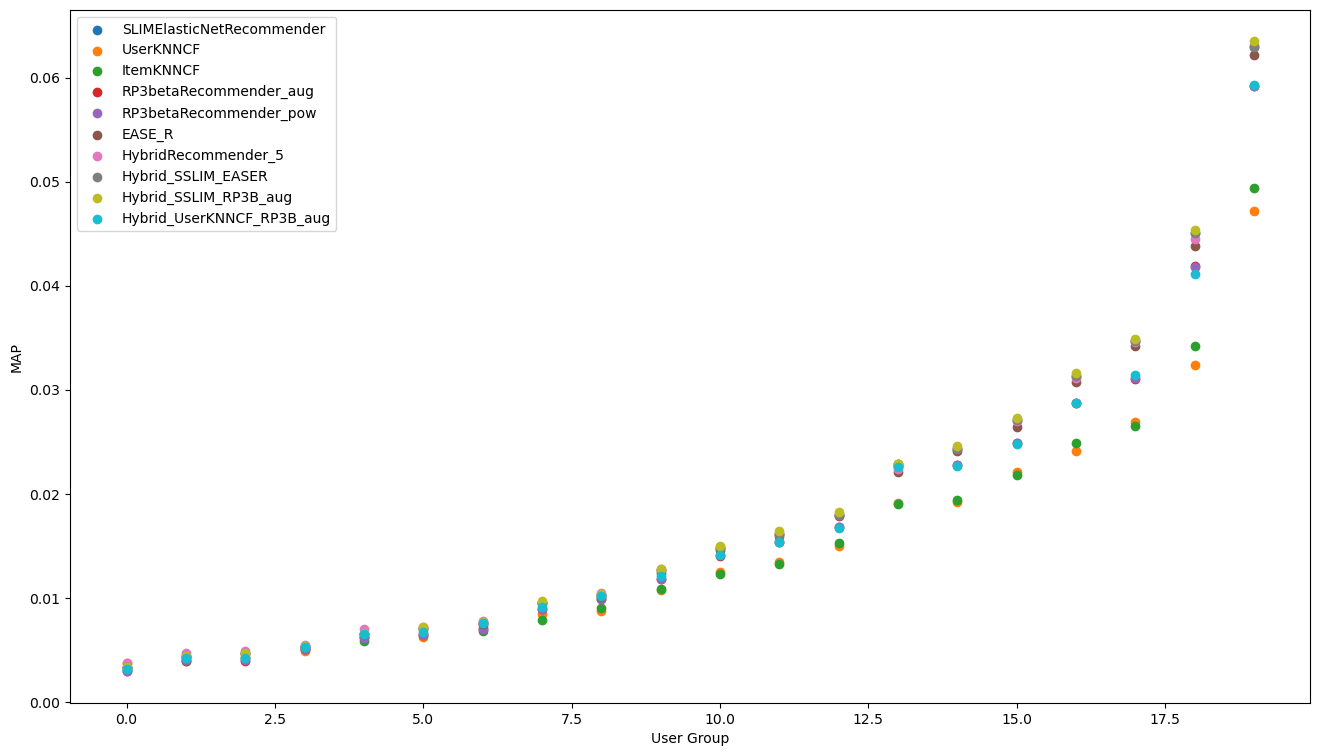

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

_ = plt.figure(figsize=(16, 9))
for label, recommender in recommender_object_dict.items():
    results = MAP_recommender_per_group[label]
    plt.scatter(x=np.arange(0,len(results)), y=results, label=label)
    print(len(results))
plt.ylabel('MAP')
plt.xlabel('User Group')
plt.legend()
plt.show()

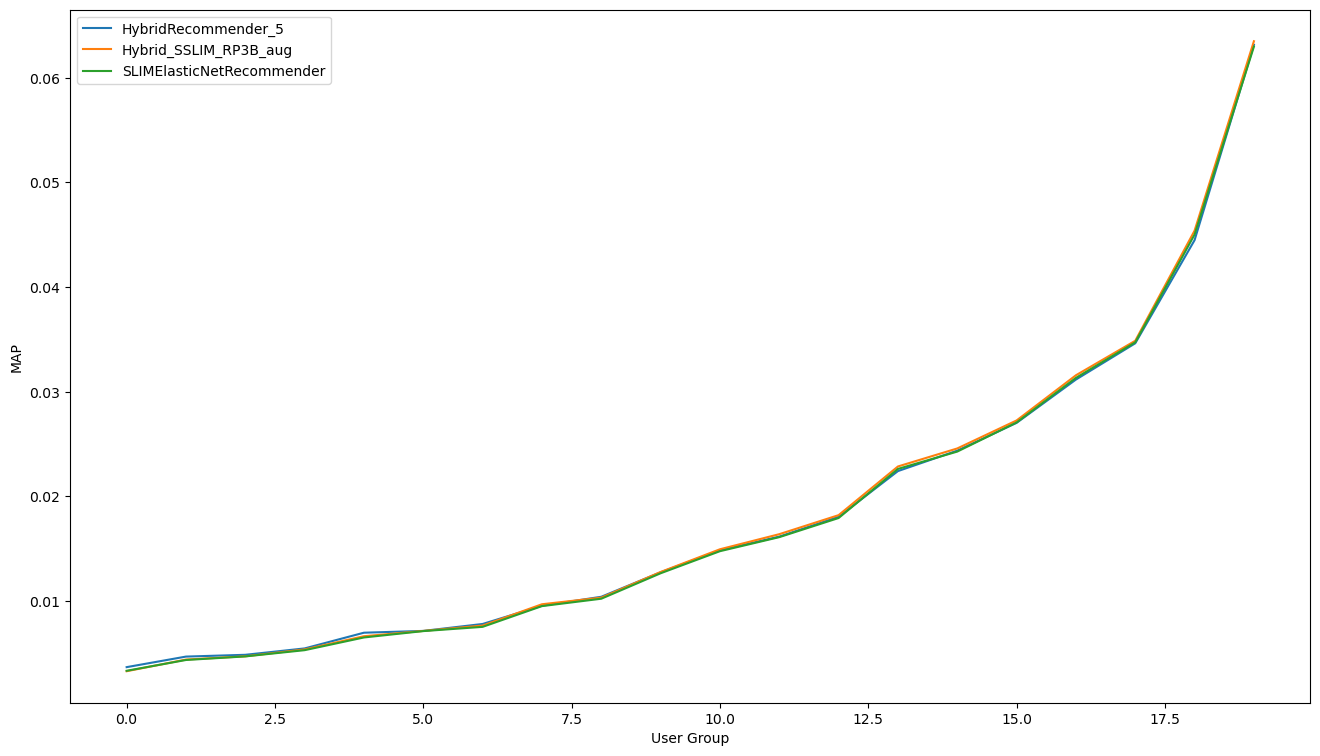

'\n"SLIMElasticNetRecommender": SLIMElasticNetRecommender,\n        "UserKNNCF": UserKNNCFRecommender,\n        "ItemKNNCF": ItemKNNCFRecommender,\n        "RP3betaRecommender_aug": RP3betaRecommender,\n        "RP3betaRecommender_pow": RP3betaRecommender,\n        "EASE_R": EASE_R_Recommender,\n        "HybridRecommender_5" : HybridRecommender_5,\n        "Hybrid_SSLIM_EASER": Hybrid_SSLIM_EASER,\n'

In [ ]:
import matplotlib.pyplot as pyplot
%matplotlib inline
_ = plt.figure(figsize=(16, 9))

results = MAP_recommender_per_group["HybridRecommender_5"]
pyplot.plot(np.arange(0,len(results)),results, label="HybridRecommender_5")
results = MAP_recommender_per_group["Hybrid_SSLIM_RP3B_aug"]
pyplot.plot(np.arange(0,len(results)),results, label="Hybrid_SSLIM_RP3B_aug")
results = MAP_recommender_per_group["SLIMElasticNetRecommender"]
pyplot.plot(np.arange(0,len(results)),results, label="SLIMElasticNetRecommender")
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

'''
"SLIMElasticNetRecommender": SLIMElasticNetRecommender,
        "UserKNNCF": UserKNNCFRecommender,
        "ItemKNNCF": ItemKNNCFRecommender,
        "RP3betaRecommender_aug": RP3betaRecommender,
        "RP3betaRecommender_pow": RP3betaRecommender,
        "EASE_R": EASE_R_Recommender,
        "HybridRecommender_5" : HybridRecommender_5,
        "Hybrid_SSLIM_EASER": Hybrid_SSLIM_EASER,
'''